**INTRODUCTION**


The differential diagnosis of erythemato-squamous diseases is a real problem in 
dermatology. They all share the clinical features of erythema and scaling, with very little 
differences. The diseases in this group are psoriasis, seboreic dermatitis, lichen planus, 
pityriasis rosea, cronic dermatitis, and pityriasis rubra pilaris. Usually a biopsy is 
necessary for the diagnosis but unfortunately these diseases share many 
histopathological features as well. Another difficulty for the differential diagnosis is that 
a disease may show the features of another disease at the beginning stage and may have 
the characteristic features at the following stages. Patients were first evaluated clinically
with 12 features. Afterwards, skin samples were taken for the evaluation of 22 
histopathological features. The values of the histopathological features are determined 
by an analysis of the samples under a microscope.


In the dataset constructed for this domain, the family history feature has the value 1 if 
any of these diseases has been observed in the family, and 0 otherwise. The age feature 
simply represents the age of the patient. Every other feature (clinical and 
histopathological) was given a degree in the range of 0 to 3. Here, 0 indicates that the 
feature was not present, 3 indicates the largest amount possible, and 1, 2 indicate the 
relative intermediate values.


Attribute Information:


Clinical Attributes: (take values 0, 1, 2, 3, unless otherwise indicated)


1: erythema 
2: scaling 
3: definite borders 
4: itching 
5: koebner phenomenon 
6: polygonal papules 
7: follicular papules 
8: oral mucosal involvement 
9: knee and elbow involvement 
10: scalp involvement 
11: family history, (0 or 1)
34: Age (linear) 


Histopathological Attributes: (take values 0, 1, 2, 3) 


12: melanin incontinence 
13: eosinophils in the infiltrate 
14: PNL infiltrate 
15: fibrosis of the papillary dermis 
16: exocytosis 
17: acanthosis 
18: hyperkeratosis 
19: parakeratosis 
20: clubbing of the rete ridges 
21: elongation of the rete ridges 
22: thinning of the suprapapillary epidermis 
23: spongiform pustule 
24: munro microabcess 
25: focal hypergranulosis 
26: disappearance of the granular layer 
27: vacuolisation and damage of basal layer 
28: spongiosis 
29: saw-tooth appearance of retes 
30: follicular horn plug 
31: perifollicular parakeratosis 
32: inflammatory monoluclear inflitrate 
33: band-like infiltrate

Class :
•	1: psoriasis
•	2: seboreic dermatitis
•	3: lichen planus
•	4: pityriasis rosea
•	5: cronic dermatitis
•	6: pityriasis rubra pilaris

The source of the dataset isDatahub. This dataset consists of integer and float data types. This dataset consists of 35 columns and 366rows of data points. For the classification problem we consider the last column that is “class” as the classification column and the other columns as the independent columns or the columns which supports the classification


**IMPORTING REQUIRED MODULES**

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score,r2_score,confusion_matrix

from sklearn.metrics import classification_report

import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [ ]:
from google.colab import files
up=files.upload()

Saving dermatology_csv.csv to dermatology_csv.csv


**Reading the dataset**

In [ ]:
df=pd.read_csv("dermatology_csv.csv")
df

,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,...,disappearance_of_the_granular_layer,vacuolisation_and_damage_of_basal_layer,spongiosis,saw-tooth_appearance_of_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_monoluclear_inflitrate,band-like_infiltrate,age,class
0,2,2,0,3,0,0,0,0,1,0,...,0,0,3,0,0,0,1,0,55.0,2
1,3,3,3,2,1,0,0,0,1,1,...,0,0,0,0,0,0,1,0,8.0,1
2,2,1,2,3,1,3,0,3,0,0,...,0,2,3,2,0,0,2,3,26.0,3
3,2,2,2,0,0,0,0,0,3,2,...,3,0,0,0,0,0,3,0,40.0,1
4,2,3,2,2,2,2,0,2,0,0,...,2,3,2,3,0,0,2,3,45.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,2,1,1,0,1,0,0,0,0,0,...,0,0,1,0,0,0,2,0,25.0,4
362,3,2,1,0,1,0,0,0,0,0,...,1,0,1,0,0,0,2,0,36.0,4
363,3,2,2,2,3,2,0,2,0,0,...,0,3,0,3,0,0,2,3,28.0,3
364,2,1,3,1,2,3,0,2,0,0,...,0,2,0,1,0,0,2,3,50.0,3


# ***EDA on the data set***

In [ ]:
df.head()

,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,...,disappearance_of_the_granular_layer,vacuolisation_and_damage_of_basal_layer,spongiosis,saw-tooth_appearance_of_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_monoluclear_inflitrate,band-like_infiltrate,age,class
0,2,2,0,3,0,0,0,0,1,0,...,0,0,3,0,0,0,1,0,55.0,2
1,3,3,3,2,1,0,0,0,1,1,...,0,0,0,0,0,0,1,0,8.0,1
2,2,1,2,3,1,3,0,3,0,0,...,0,2,3,2,0,0,2,3,26.0,3
3,2,2,2,0,0,0,0,0,3,2,...,3,0,0,0,0,0,3,0,40.0,1
4,2,3,2,2,2,2,0,2,0,0,...,2,3,2,3,0,0,2,3,45.0,3


**Checking for null value**

In this step we check whether there is any NULL values present in the data set.


In [ ]:
df.isnull().sum()

erythema                                    0
scaling                                     0
definite_borders                            0
itching                                     0
koebner_phenomenon                          0
polygonal_papules                           0
follicular_papules                          0
oral_mucosal_involvement                    0
knee_and_elbow_involvement                  0
scalp_involvement                           0
family_history                              0
melanin_incontinence                        0
eosinophils_in_the_infiltrate               0
pnl_infiltrate                              0
fibrosis_of_the_papillary_dermis            0
exocytosis                                  0
acanthosis                                  0
hyperkeratosis                              0
parakeratosis                               0
clubbing_of_the_rete_ridges                 0
elongation_of_the_rete_ridges               0
thinning_of_the_suprapapillary_epi

In [ ]:
df1=df.ffill()

In [ ]:
df1.isnull().sum()

erythema                                    0
scaling                                     0
definite_borders                            0
itching                                     0
koebner_phenomenon                          0
polygonal_papules                           0
follicular_papules                          0
oral_mucosal_involvement                    0
knee_and_elbow_involvement                  0
scalp_involvement                           0
family_history                              0
melanin_incontinence                        0
eosinophils_in_the_infiltrate               0
pnl_infiltrate                              0
fibrosis_of_the_papillary_dermis            0
exocytosis                                  0
acanthosis                                  0
hyperkeratosis                              0
parakeratosis                               0
clubbing_of_the_rete_ridges                 0
elongation_of_the_rete_ridges               0
thinning_of_the_suprapapillary_epi

In [ ]:
df1.columns

Index(['erythema', 'scaling', 'definite_borders', 'itching',
       'koebner_phenomenon', 'polygonal_papules', 'follicular_papules',
       'oral_mucosal_involvement', 'knee_and_elbow_involvement',
       'scalp_involvement', 'family_history', 'melanin_incontinence',
       'eosinophils_in_the_infiltrate', 'pnl_infiltrate',
       'fibrosis_of_the_papillary_dermis', 'exocytosis', 'acanthosis',
       'hyperkeratosis', 'parakeratosis', 'clubbing_of_the_rete_ridges',
       'elongation_of_the_rete_ridges',
       'thinning_of_the_suprapapillary_epidermis', 'spongiform_pustule',
       'munro_microabcess', 'focal_hypergranulosis',
       'disappearance_of_the_granular_layer',
       'vacuolisation_and_damage_of_basal_layer', 'spongiosis',
       'saw-tooth_appearance_of_retes', 'follicular_horn_plug',
       'perifollicular_parakeratosis', 'inflammatory_monoluclear_inflitrate',
       'band-like_infiltrate', 'age', 'class'],
      dtype='object')

In [ ]:
df1.describe()

,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,...,disappearance_of_the_granular_layer,vacuolisation_and_damage_of_basal_layer,spongiosis,saw-tooth_appearance_of_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_monoluclear_inflitrate,band-like_infiltrate,age,class
count,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,...,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000
mean,2.068306,1.795082,1.549180,1.366120,0.633880,0.448087,0.166667,0.377049,0.614754,0.519126,...,0.464481,0.456284,0.953552,0.453552,0.103825,0.114754,1.866120,0.554645,36.267760,2.803279
std,0.664753,0.701527,0.907525,1.138299,0.908016,0.957327,0.570588,0.834147,0.982979,0.905639,...,0.864899,0.954873,1.130172,0.954744,0.450433,0.488723,0.726108,1.105908,15.157598,1.597803
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,25.000000,1.000000
50%,2.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,35.000000,3.000000
75%,2.000000,2.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,2.000000,0.000000,48.000000,4.000000
max,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,...,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,75.000000,6.000000


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 35 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   erythema                                  366 non-null    int64  
 1   scaling                                   366 non-null    int64  
 2   definite_borders                          366 non-null    int64  
 3   itching                                   366 non-null    int64  
 4   koebner_phenomenon                        366 non-null    int64  
 5   polygonal_papules                         366 non-null    int64  
 6   follicular_papules                        366 non-null    int64  
 7   oral_mucosal_involvement                  366 non-null    int64  
 8   knee_and_elbow_involvement                366 non-null    int64  
 9   scalp_involvement                         366 non-null    int64  
 10  family_history                        

**Using boxplot dermining the outliers**

The main features that the boxplot shows the median of the data, which 
represents where the middle datapoint is. Box plot shows the range of values of different numerical variables. Finally, boxplots also display 
“outliers” as individual dots that occur outside the upper and lower 
extremes. With boxplots, you can easily spot outliers.

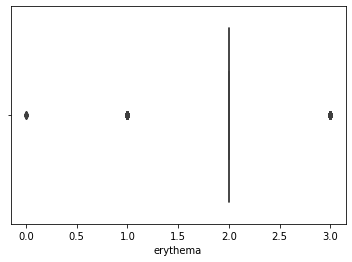

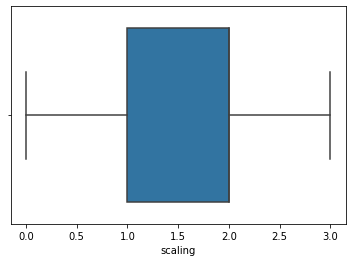

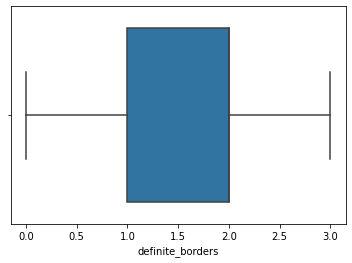

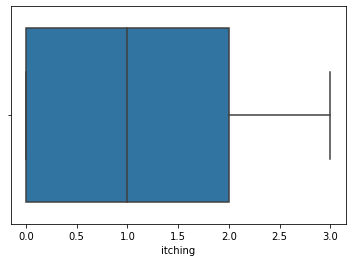

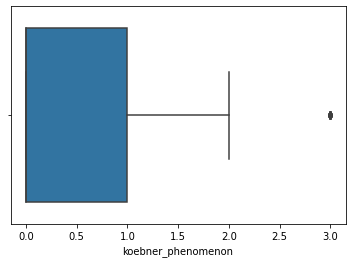

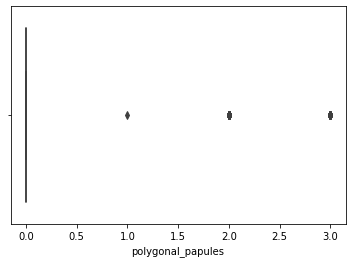

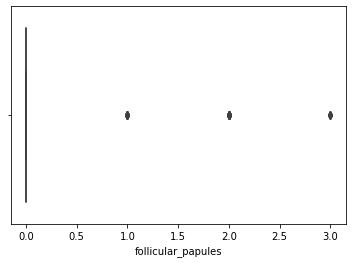

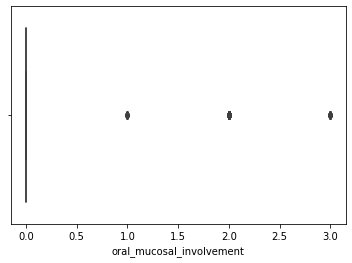

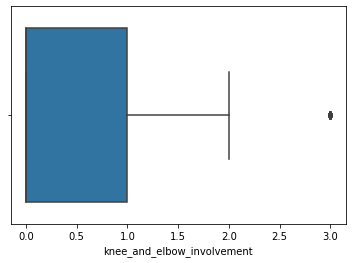

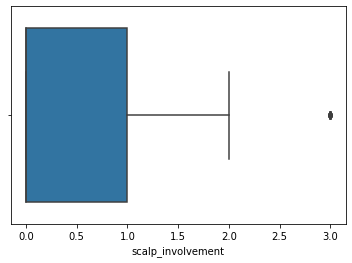

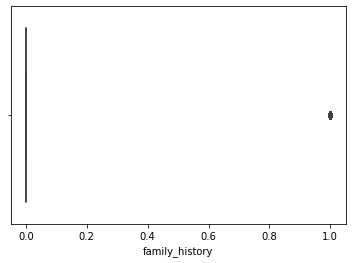

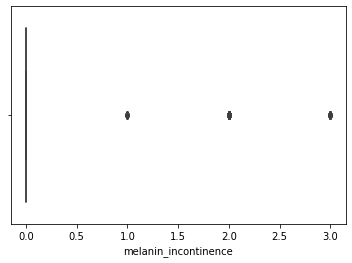

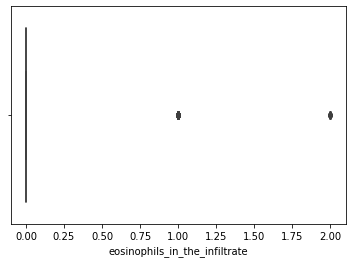

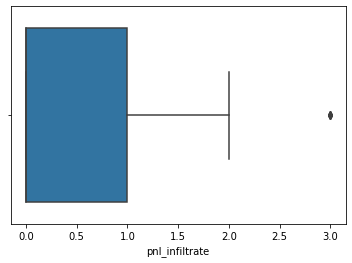

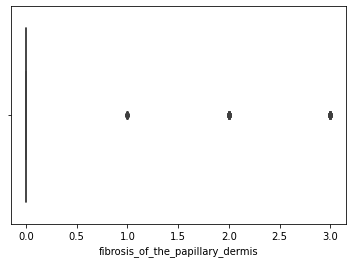

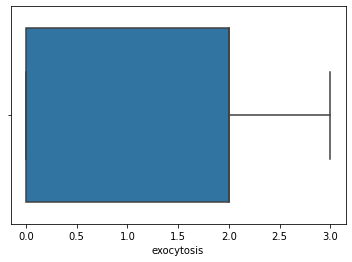

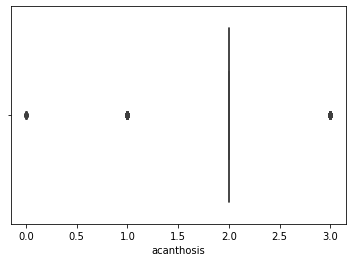

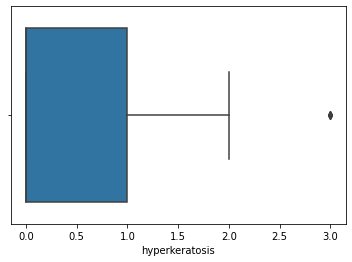

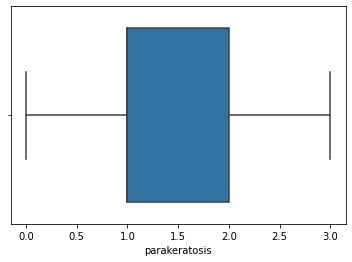

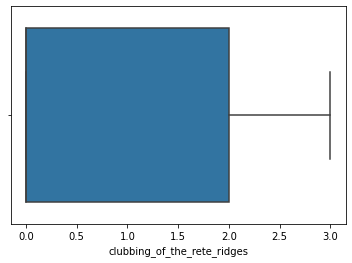

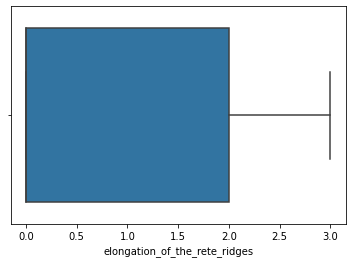

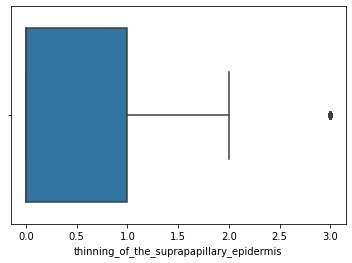

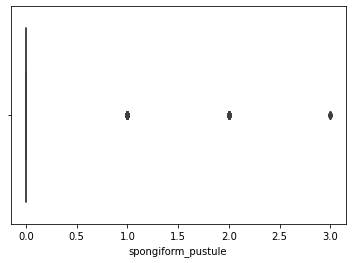

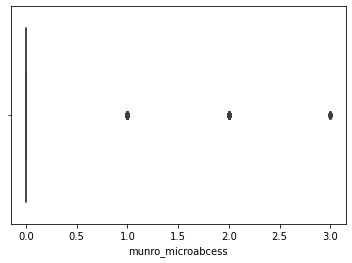

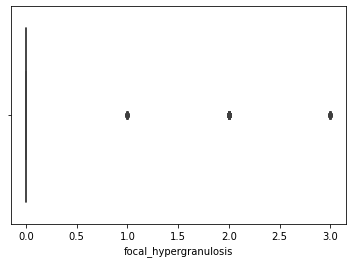

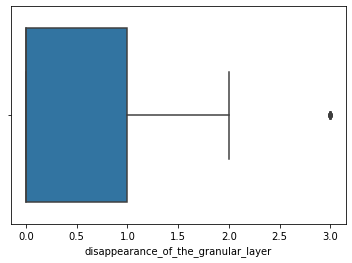

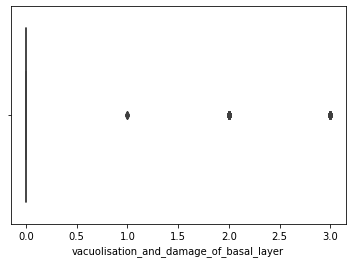

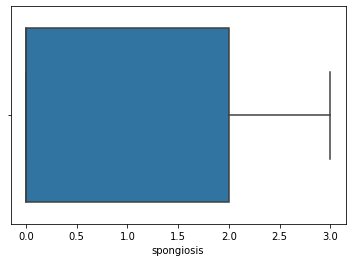

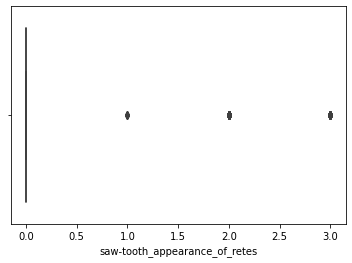

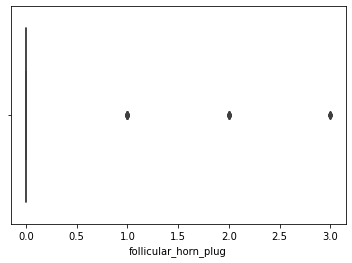

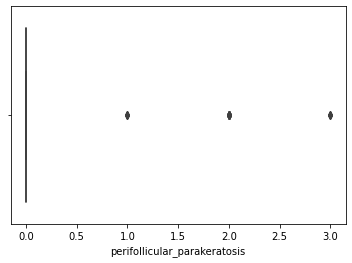

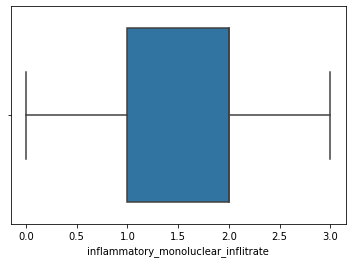

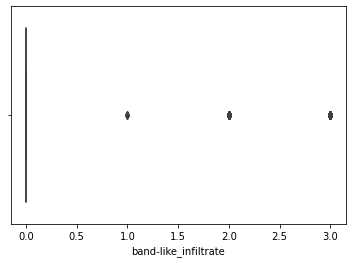

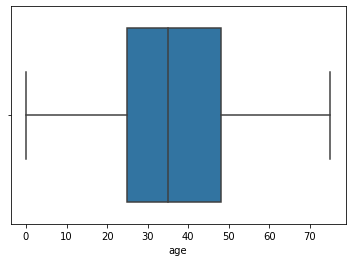

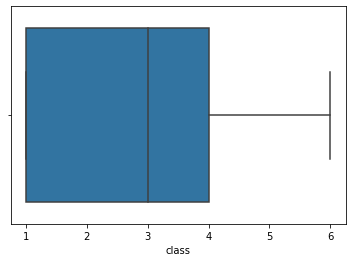

In [ ]:
for i in df1:
  sns.boxplot(x=df1[i])
  plt.show()

{'boxes': [<matplotlib.lines.Line2D at 0x7ff59b413050>],
 'caps': [<matplotlib.lines.Line2D at 0x7ff59b406050>,
 'fliers': [<matplotlib.lines.Line2D at 0x7ff59b3fe090>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7ff59b406b10>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7ff59b413590>,
  <matplotlib.lines.Line2D at 0x7ff59b413ad0>]}

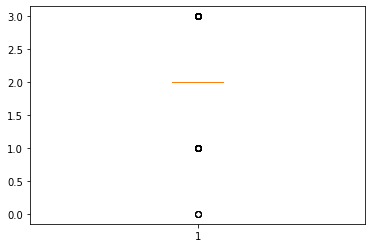

In [ ]:
plt.boxplot(df1['erythema'],vert=True,patch_artist=False)

{'boxes': [<matplotlib.lines.Line2D at 0x7ff59b478550>],
 'caps': [<matplotlib.lines.Line2D at 0x7ff59b4ab550>,
 'fliers': [<matplotlib.lines.Line2D at 0x7ff59b4a2590>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7ff59b4a2050>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7ff59b478a90>,
  <matplotlib.lines.Line2D at 0x7ff59b478fd0>]}

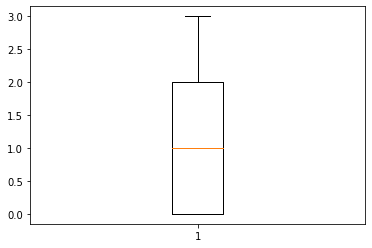

In [ ]:
plt.boxplot(df1['itching'],vert=True,patch_artist=False)

{'boxes': [<matplotlib.lines.Line2D at 0x7ff59b792450>],
 'caps': [<matplotlib.lines.Line2D at 0x7ff59b788450>,
 'fliers': [<matplotlib.lines.Line2D at 0x7ff59b775490>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7ff59b788f10>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7ff59b792990>,
  <matplotlib.lines.Line2D at 0x7ff59b792ed0>]}

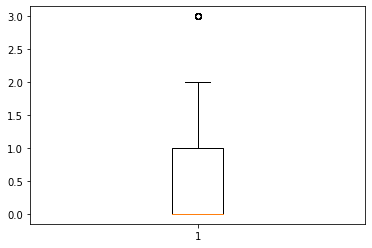

In [ ]:
plt.boxplot(df1['koebner_phenomenon'],vert=True,patch_artist=False)

{'boxes': [<matplotlib.lines.Line2D at 0x7ff59b7157d0>],
 'caps': [<matplotlib.lines.Line2D at 0x7ff59b7237d0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7ff59b0b9810>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7ff59b0b92d0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7ff59b715d10>,
  <matplotlib.lines.Line2D at 0x7ff59b723290>]}

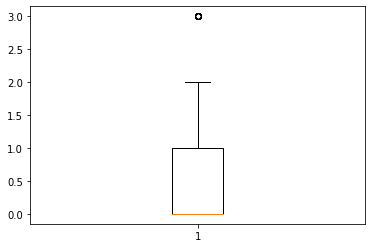

In [ ]:
plt.boxplot(df1['knee_and_elbow_involvement'],vert=True,patch_artist=False)

Outlier removal of the knee_and_elbow_involvement column by using the Inter Quartile Range 
Method.


In [ ]:
IQR=stats.iqr(df1.knee_and_elbow_involvement,interpolation='midpoint')
IQR

1.0

In [ ]:
Q1=df1.knee_and_elbow_involvement.quantile(0.25)
Q3=df1.knee_and_elbow_involvement.quantile(0.75)
min_limit=Q1-1.5*IQR
max_limit=Q3+1.5*IQR

In [ ]:
min_limit

-1.5

In [ ]:
max_limit

2.5

In [ ]:
df1.loc[df1['knee_and_elbow_involvement']>max_limit]

,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,...,disappearance_of_the_granular_layer,vacuolisation_and_damage_of_basal_layer,spongiosis,saw-tooth_appearance_of_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_monoluclear_inflitrate,band-like_infiltrate,age,class
3,2,2,2,0,0,0,0,0,3,2,...,3,0,0,0,0,0,3,0,40.0,1
17,3,3,3,0,0,0,0,0,3,3,...,3,0,0,0,0,0,2,0,38.0,1
32,2,3,3,3,3,0,0,0,3,3,...,0,0,0,0,0,0,1,0,34.0,1
47,2,1,1,1,0,0,2,0,3,2,...,0,0,0,0,0,1,1,1,12.0,6
71,2,1,2,0,0,0,3,0,3,0,...,0,0,0,0,3,3,0,0,13.0,6
93,3,3,3,3,3,0,0,0,3,3,...,1,0,0,0,0,0,2,0,42.0,1
110,2,2,2,3,2,0,0,0,3,3,...,1,0,0,0,0,0,2,0,41.0,1
122,1,1,2,0,0,0,3,0,3,0,...,0,0,0,0,2,2,2,0,7.0,6
172,3,2,3,0,0,0,0,0,3,0,...,3,0,0,0,0,0,1,0,56.0,1
175,2,2,2,0,0,0,0,0,3,2,...,2,0,0,0,0,0,3,0,30.0,1


In [ ]:
df1.loc[df1['knee_and_elbow_involvement']>max_limit].count()

erythema                                    23
scaling                                     23
definite_borders                            23
itching                                     23
koebner_phenomenon                          23
polygonal_papules                           23
follicular_papules                          23
oral_mucosal_involvement                    23
knee_and_elbow_involvement                  23
scalp_involvement                           23
family_history                              23
melanin_incontinence                        23
eosinophils_in_the_infiltrate               23
pnl_infiltrate                              23
fibrosis_of_the_papillary_dermis            23
exocytosis                                  23
acanthosis                                  23
hyperkeratosis                              23
parakeratosis                               23
clubbing_of_the_rete_ridges                 23
elongation_of_the_rete_ridges               23
thinning_of_t

In [ ]:
df1.loc[df1['knee_and_elbow_involvement']>max_limit,'knee_and_elbow_involvement']=np.median(df1.knee_and_elbow_involvement)

**Data Visualization**

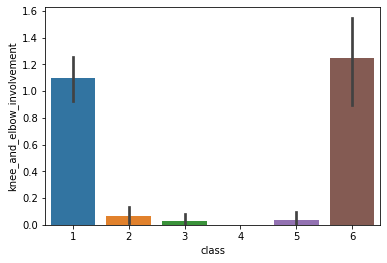

In [ ]:
sns.barplot("class","knee_and_elbow_involvement",data =df1)

From the above plot we see that knee_and_elbow_involvement has great involment in class 1 and 6,class 4 has no involvement,class 2,3,5 has least involment

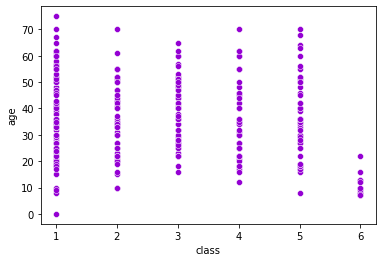

In [ ]:
sns.scatterplot("class","age",data =df1,color='darkviolet')

Here all class affect the age symptom,only 10-25 age people can affect the class 6 disease,other classes have great infulence on the age from 10-70

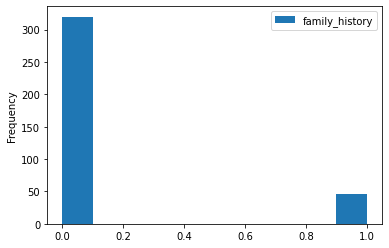

In [ ]:
df1.plot(x='class',y='family_history',kind='hist')
plt.show()

In most of the family we can see that the disease not present,few family has observe the disease present

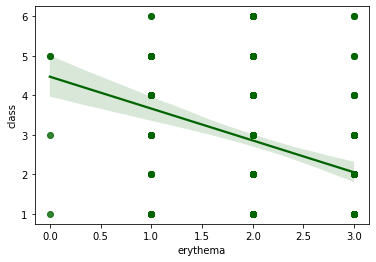

In [ ]:
sns.regplot(x='erythema',y='class',color='darkgreen',data=df1)

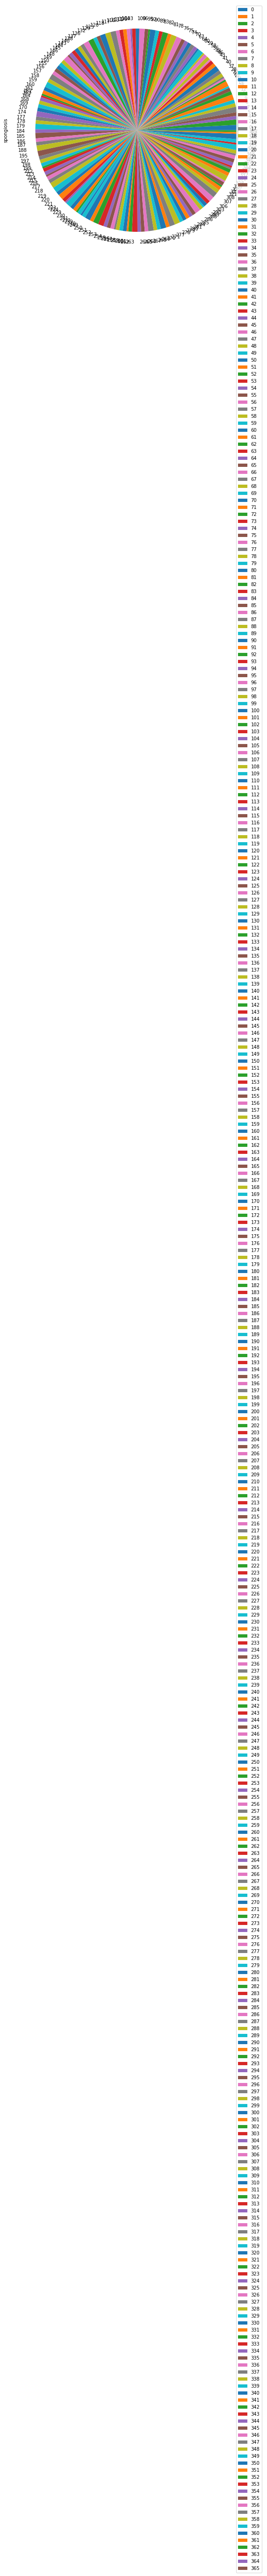

In [ ]:
df1.plot(x='class',y='spongiosis',kind='pie',figsize=(15,10))

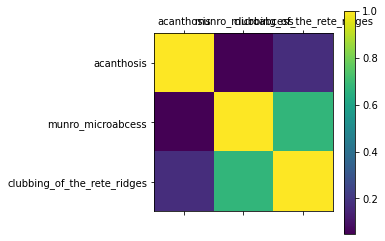

In [ ]:
df1_new=df1[['acanthosis','munro_microabcess','clubbing_of_the_rete_ridges']]
plt.matshow(df1_new.corr())
plt.xticks(range(len(df1_new.columns)),df1_new.columns)
plt.yticks(range(len(df1_new.columns)),df1_new.columns)
plt.colorbar()
plt.show()

Heat map

A heat map can explain the correlation between the variables with the color 
intensity. It is a great way to plot the target variable over multiple variables and 
through this get visual clues of the relationship between variables and the target. 
As we now have to move into building machine learning models to automate our 
analysis, feeding the model with variables that meaningfully affect our target 
variable will improve our model’s prediction performance

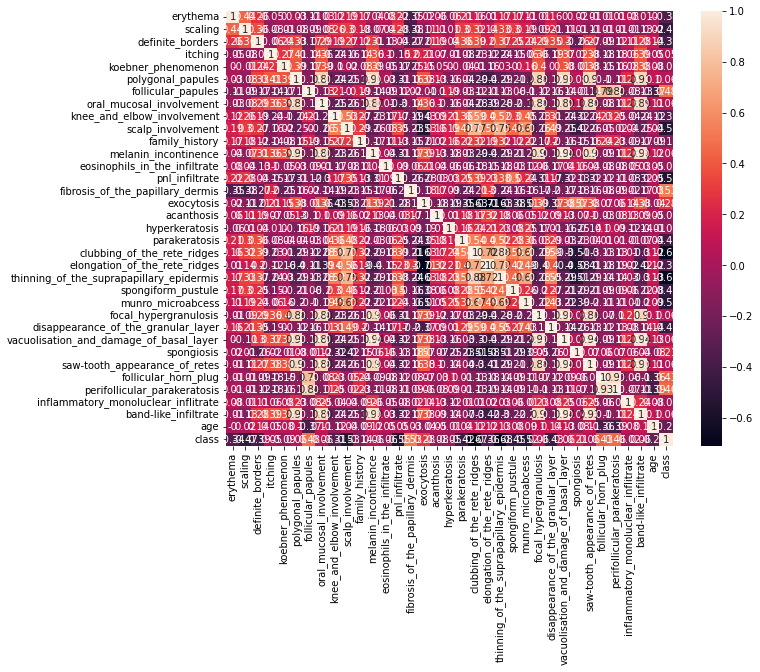

In [ ]:
corrmatrix = df1.corr().round(2)
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(corrmatrix,annot=True)


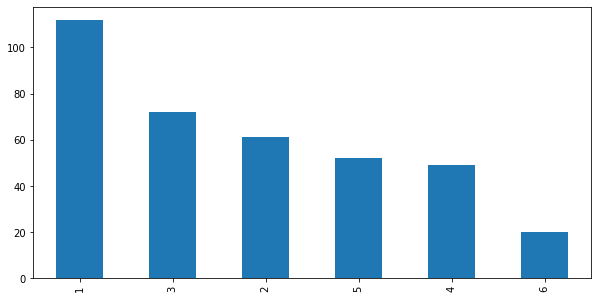

In [ ]:
fig, ax1 = plt.subplots(1, 1, figsize= (10, 5))
df1['class'].value_counts().plot(kind='bar',ax=ax1)


**splitting to x and y**

In [ ]:
x=df1.drop("class",axis=1)
y=df1["class"]


In [ ]:
x.describe()

,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,...,focal_hypergranulosis,disappearance_of_the_granular_layer,vacuolisation_and_damage_of_basal_layer,spongiosis,saw-tooth_appearance_of_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_monoluclear_inflitrate,band-like_infiltrate,age
count,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,...,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000
mean,2.068306,1.795082,1.549180,1.366120,0.633880,0.448087,0.166667,0.377049,0.426230,0.519126,...,0.393443,0.464481,0.456284,0.953552,0.453552,0.103825,0.114754,1.866120,0.554645,36.267760
std,0.664753,0.701527,0.907525,1.138299,0.908016,0.957327,0.570588,0.834147,0.771954,0.905639,...,0.849406,0.864899,0.954873,1.130172,0.954744,0.450433,0.488723,0.726108,1.105908,15.157598
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,25.000000
50%,2.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,35.000000
75%,2.000000,2.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.750000,1.000000,...,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,2.000000,0.000000,48.000000
max,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,2.000000,3.000000,...,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,75.000000


In [ ]:
y

0      2
1      1
2      3
3      1
4      3
      ..
361    4
362    4
363    3
364    3
365    1
Name: class, Length: 366, dtype: int64

**• Splitting the data into training and testing dataset**

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=10)

**MODEL BUILBING AND PREDICTION**

**1.SVM Classifier**

 Support vector machines (SVMs) are a set of supervised learning methods used 
for classification, regression and outliers detection. The advantages of support vector 
machines includes, Effective in high dimensional spaces. Still effective in cases where 
number of dimensions is greater than the number of samples. Uses a subset of training points 
in the decision function (called support vectors), so it is also memory efficient

In [ ]:
model1 = SVC(kernel='linear', C=1E6)
model1.fit(X_train, y_train)
y_pred = model1.predict(X_test)
from sklearn.metrics import accuracy_score
test_accuracy=accuracy_score(y_test, y_pred)
print('Accuracy of testing test:',test_accuracy)


Accuracy of testing test: 0.9864864864864865


In [ ]:
y_predt=model1.predict(X_train)
train_accuracy=accuracy_score(y_train, y_predt)
print('Accuracy of training test:',test_accuracy)

Accuracy of training test: 0.9864864864864865


In [ ]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           1       0.96      1.00      0.98        26
           2       1.00      1.00      1.00        11
           3       1.00      1.00      1.00        11
           4       1.00      1.00      1.00         9
           5       1.00      1.00      1.00        11
           6       1.00      0.83      0.91         6

    accuracy                           0.99        74
   macro avg       0.99      0.97      0.98        74
weighted avg       0.99      0.99      0.99        74



In [ ]:
mat = confusion_matrix(y_pred,y_test)
mat


array([[26,  0,  0,  0,  0,  0],
       [ 0, 11,  0,  0,  0,  0],
       [ 0,  0, 11,  0,  0,  0],
       [ 0,  0,  0,  9,  0,  0],
       [ 0,  0,  0,  0, 11,  0],
       [ 1,  0,  0,  0,  0,  5]])

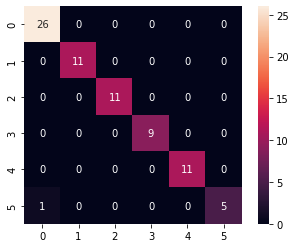

In [ ]:
sns.heatmap(mat, square=True, annot=True)

[[26  0]
 [ 0  0]]


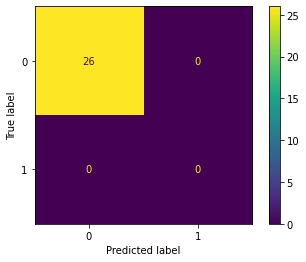

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(y_test,y_pred,labels=[1, 34])
print(cm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

**2.GaussianNB**

Naive Bayes is a simple technique for constructing classifiers: models that assign class labels 
to problem instances, represented as vectors of feature values, where the class labels are 
drawn from some finite set. There is not a single algorithm for training such classifiers, but a 
family of algorithms based on a common principle: all naive Bayes classifiers assume that the 
value of a particular feature is independent of the value of any other feature, given the class 
variable.

In [ ]:
model2 = GaussianNB() 
model2.fit(X_train, y_train) 
y_model2 = model2.predict(X_test) 
from sklearn import metrics
print("Accuracy of testing test:",metrics.accuracy_score(y_test, y_model2))


Accuracy of testing test: 0.9054054054054054


In [ ]:
y_model=model2.predict(X_train)
train_accuracy=accuracy_score(y_train, y_model)
print('Accuracy of training test:',train_accuracy)

Accuracy of training test: 0.8801369863013698


In [ ]:
print(classification_report(y_model2,y_test))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        27
           2       0.45      0.83      0.59         6
           3       1.00      1.00      1.00        11
           4       1.00      0.60      0.75        15
           5       1.00      1.00      1.00        11
           6       0.80      1.00      0.89         4

    accuracy                           0.91        74
   macro avg       0.88      0.91      0.87        74
weighted avg       0.94      0.91      0.91        74



In [ ]:
mat1 = confusion_matrix(y_model2,y_test)
mat1


array([[27,  0,  0,  0,  0,  0],
       [ 0,  5,  0,  0,  0,  1],
       [ 0,  0, 11,  0,  0,  0],
       [ 0,  6,  0,  9,  0,  0],
       [ 0,  0,  0,  0, 11,  0],
       [ 0,  0,  0,  0,  0,  4]])

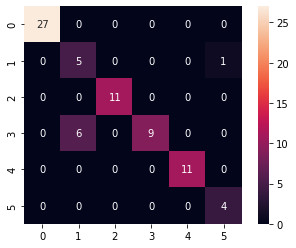

In [ ]:
sns.heatmap(mat1, square=True, annot=True)

[[27  0]
 [ 0  0]]


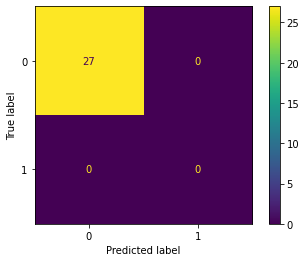

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(y_test,y_model2,labels=[1, 34])
print(cm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

**3.RandomForestClassifier**

Random Forest is a popular machine learning algorithm that belongs to the supervised 
learning technique. It can be used for both Classification and Regression problems in ML. It 
is based on the concept of ensemble learning, which is a process of combining multiple 
classifiers to solve a complex problem and to improve the performance of the model.As the 
name suggests, Random Forest is a classifier that contains a number of decision trees on 
various subsets of the given dataset and takes the average to improve the predictive accuracy 
of that dataset. Instead of relying on one decision tree, the random forest takes the prediction 
from each tree and based on the majority votes of predictions, and it predicts the final output

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model3= RandomForestClassifier()
model3.fit(X_train, y_train)
y_model3=model3.predict(X_test)
from sklearn import metrics
print("Accuracy of testing test:",metrics.accuracy_score(y_test, y_model3))


Accuracy of testing test: 0.9594594594594594


In [ ]:
y_model3a=model3.predict(X_train)
train_accuracy=accuracy_score(y_train, y_model3a)
print('Accuracy of training test:',train_accuracy)

Accuracy of training test: 1.0


In [ ]:
print(classification_report(y_model3,y_test))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        27
           2       0.91      0.83      0.87        12
           3       1.00      1.00      1.00        11
           4       0.89      0.89      0.89         9
           5       1.00      1.00      1.00        11
           6       0.80      1.00      0.89         4

    accuracy                           0.96        74
   macro avg       0.93      0.95      0.94        74
weighted avg       0.96      0.96      0.96        74



In [ ]:
mat2 = confusion_matrix(y_model3,y_test)
mat2


array([[27,  0,  0,  0,  0,  0],
       [ 0, 10,  0,  1,  0,  1],
       [ 0,  0, 11,  0,  0,  0],
       [ 0,  1,  0,  8,  0,  0],
       [ 0,  0,  0,  0, 11,  0],
       [ 0,  0,  0,  0,  0,  4]])

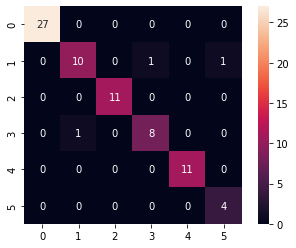

In [ ]:
sns.heatmap(mat2, square=True, annot=True)

[[27  0]
 [ 0  0]]


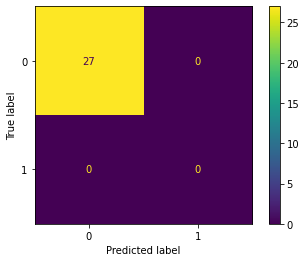

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(y_test,y_model3,labels=[1, 34])
print(cm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

**4.LogisticRegression**

Logistic regression is a process of modeling the probability of a discrete outcome given an 
input variable. The most common logistic regression models a binary outcome; something that 
can take two values such as true/false, yes/no, and so on. Multinomial logistic regression can 
model scenarios where there are more than two possible discrete outcomes. Logistic regression 
is a useful analysis method for classification problems, where you are trying to determine if a 
new sample fits best into a category.


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
model4=LogisticRegression(random_state=42)
model4.fit(X_train,y_train)
y_model4=model4.predict(X_test)
print('Accuracy of testing test:',metrics.accuracy_score(y_test,y_model4))

Accuracy of testing test: 1.0


In [ ]:
y_model4a=model4.predict(X_train)
train_accuracy=accuracy_score(y_train, y_model4a)
print('Accuracy of training test:',train_accuracy)

Accuracy of training test: 1.0


In [ ]:
print(classification_report(y_model4,y_test))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        27
           2       1.00      1.00      1.00        11
           3       1.00      1.00      1.00        11
           4       1.00      1.00      1.00         9
           5       1.00      1.00      1.00        11
           6       1.00      1.00      1.00         5

    accuracy                           1.00        74
   macro avg       1.00      1.00      1.00        74
weighted avg       1.00      1.00      1.00        74



In [ ]:
mat3 = confusion_matrix(y_model4,y_test)
mat3


array([[27,  0,  0,  0,  0,  0],
       [ 0, 11,  0,  0,  0,  0],
       [ 0,  0, 11,  0,  0,  0],
       [ 0,  0,  0,  9,  0,  0],
       [ 0,  0,  0,  0, 11,  0],
       [ 0,  0,  0,  0,  0,  5]])

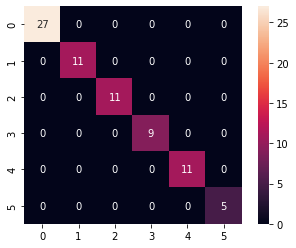

In [ ]:
sns.heatmap(mat3, square=True, annot=True)

[[27  0]
 [ 0  0]]


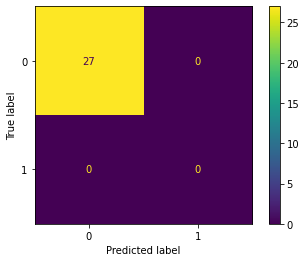

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(y_test,y_model4,labels=[1, 34])
print(cm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

**5.KNNClassifier**

The k-nearest neighbours (KNN) algorithm is a simple, supervised machine learning 
algorithm that can be used to solve both classification and regression problems.It is easy to 
implement and understand, but has a major drawback of becoming significantly slow as the 
size of that data in use grows


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model5=KNeighborsClassifier()
model5.fit(X_train,y_train)
y_model5=model5.predict(X_test)
print('Accuracy of testing test:',metrics.accuracy_score(y_test,y_model5))

Accuracy of testing test: 0.8783783783783784


In [ ]:
y_model5a=model5.predict(X_train)
train_accuracy=accuracy_score(y_train, y_model5a)
print('Accuracy of training test:',train_accuracy)

Accuracy of training test: 0.9246575342465754


In [ ]:
print(classification_report(y_model5,y_test))

              precision    recall  f1-score   support

           1       0.96      1.00      0.98        26
           2       0.82      0.69      0.75        13
           3       1.00      1.00      1.00        11
           4       0.78      0.70      0.74        10
           5       0.73      1.00      0.84         8
           6       0.80      0.67      0.73         6

    accuracy                           0.88        74
   macro avg       0.85      0.84      0.84        74
weighted avg       0.88      0.88      0.87        74



In [ ]:
mat4 = confusion_matrix(y_model5,y_test)
mat4


array([[26,  0,  0,  0,  0,  0],
       [ 0,  9,  0,  2,  1,  1],
       [ 0,  0, 11,  0,  0,  0],
       [ 0,  2,  0,  7,  1,  0],
       [ 0,  0,  0,  0,  8,  0],
       [ 1,  0,  0,  0,  1,  4]])

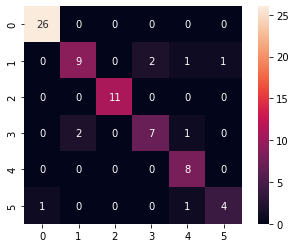

In [ ]:
sns.heatmap(mat4, square=True, annot=True)

[[26  0]
 [ 0  0]]


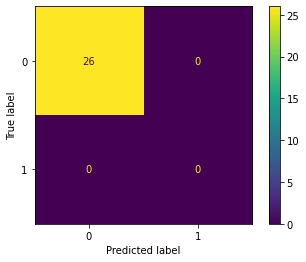

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(y_test,y_model5,labels=[1, 34])
print(cm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

**6.XGBClassifier**

Gradient boosting is a machine learning technique used in regression and classification tasks, 
among others. It gives a prediction model in the form of an ensemble of weak prediction 
models, which are typically decision trees.
[1][2] When a decision tree is the weak learner, the 
resulting algorithm is called gradient-boosted trees; it usually outperforms random forest. A 
gradient-boosted trees model is built in a stage-wise fashion as in other boosting methods, but 
it generalizes the other methods by allowing optimization of an arbitrary differentiable loss 
function.


In [ ]:
from xgboost import XGBClassifier
model6=XGBClassifier()
model6.fit(X_train,y_train)
y_model6=model6.predict(X_test)
print('Accuracy of testing test:',metrics.accuracy_score(y_test,y_model6))

Accuracy of testing test: 0.972972972972973


In [ ]:
y_model6a=model6.predict(X_train)
train_accuracy=accuracy_score(y_train, y_model6a)
print('Accuracy of training test:',train_accuracy)

Accuracy of training test: 1.0


In [ ]:
print(classification_report(y_model6,y_test))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        27
           2       0.91      0.91      0.91        11
           3       1.00      1.00      1.00        11
           4       0.89      0.89      0.89         9
           5       1.00      1.00      1.00        11
           6       1.00      1.00      1.00         5

    accuracy                           0.97        74
   macro avg       0.97      0.97      0.97        74
weighted avg       0.97      0.97      0.97        74



In [ ]:
mat5 = confusion_matrix(y_model6,y_test)
mat5


array([[27,  0,  0,  0,  0,  0],
       [ 0, 10,  0,  1,  0,  0],
       [ 0,  0, 11,  0,  0,  0],
       [ 0,  1,  0,  8,  0,  0],
       [ 0,  0,  0,  0, 11,  0],
       [ 0,  0,  0,  0,  0,  5]])

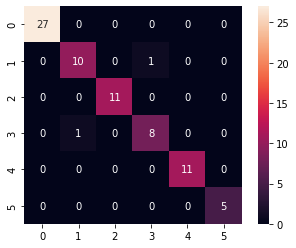

In [ ]:
sns.heatmap(mat5, square=True, annot=True)

[[27  0]
 [ 0  0]]


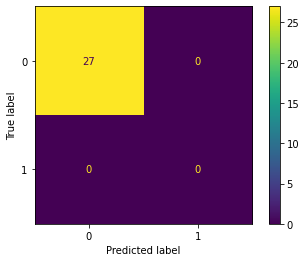

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(y_test,y_model6,labels=[1, 34])
print(cm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

Evaluating The Accuracy Of The Models



In [ ]:
DF=pd.DataFrame({'test_acc':[98,90,95,100,87,97],'train_acc':[98,88,100,100,92,100]},index=['SVM Classifier','Gaussian NB','Random Forest Classifier','Logistic Regression','KNN','XGBoost'],)
DF

,test_acc,train_acc
SVM Classifier,98,98
Gaussian NB,90,88
Random Forest Classifier,95,100
Logistic Regression,100,100
KNN,87,92
XGBoost,97,100


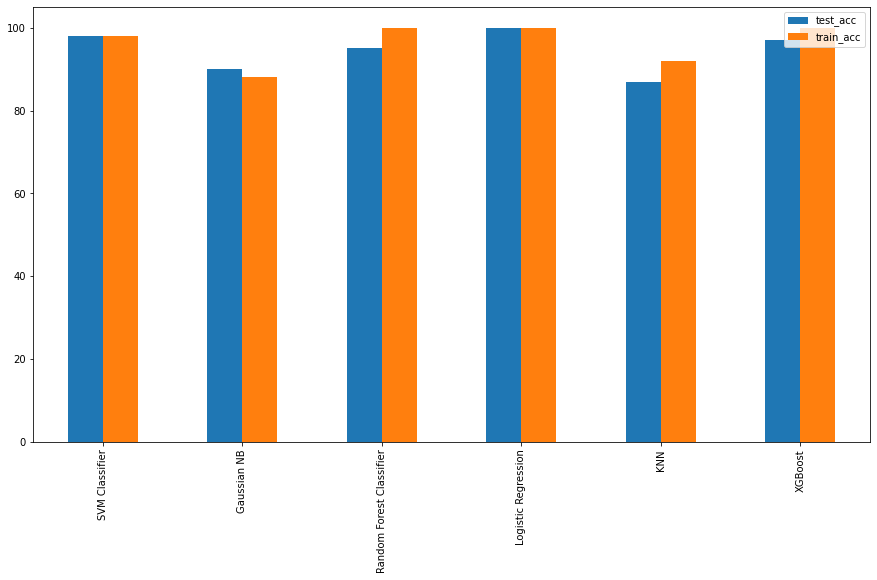

In [ ]:
DF.plot(kind="bar",figsize=(15,8))

**Conclusion:**

We have analysed  using machine learning to predict 
class. We have used SVM Classifier,Gaussian NB,Random Forest Classifier,Logistic Regression,KNN Classifier,XGBoost Classifier. We trained our models with 34 features. All the models gives the best to the data.